# Computer Vision - Input/Output + Basic operations

In this first practical session, you will use the `opencv` library to handle input and output and some operations that can be applied to an image, such as taking a photo of yourself and display it in another colorspace.  
Note that this session will cover the first part of your project as you have to record yourselves.

In [2]:
%matplotlib inline

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageOps, ImageEnhance, Image
from augmentation import RandAugmentation
from ipywidgets import interact

plt.rcParams['figure.figsize'] = [12, 8]

#### Step 1:  take a photo with your webcam
We create an object to access the webcam and we take a photo.  
What is the format use to represent the red, blue and green channels by `opencv`. Do we need to change it to display the image with `matplotlib`?

In [ ]:
# Create the object to use the webcam
vid = cv2.VideoCapture(0)

# Read a frame from your webcam
ret, frame = vid.read()

# Close the webcam
vid.release()

# Convertion from BGR to RGB
rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Save the photo

cv2.imwrite('mySuperPhoto.png', frame)

# Display the photo
plt.imshow(rgb_frame)
plt.show()

#### Step 2: change of colorspace
Convertion of the photo in another colorspace, for example the HSV one.

In [ ]:
# Change of colorspace
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Display the result
plt.imshow(hsv_frame)
plt.show()

#### Step 3: apply some transformations on the image
We can also change the properties of an image, such as its contrast, brightness, saturation, ...  
The library `PIL` is well suited for those operations. Can you apply those transformations on an `opencv` object (array)? What kind of object do you have to use?

In [ ]:
# Convert the RGB image to a PIL object
pil_frame = Image.fromarray(rgb_frame)

# Change the contrast of the image
def contrast(v):
    contrast = ImageEnhance.Contrast(pil_frame).enhance(v)

    contrast = np.array(contrast)
    plt.imshow(contrast)
    plt.show()

In [ ]:
interact(contrast, v=(0., 2.))

In the following cell, we apply a random augmentation to an image.  
See `augmentation.py` for the different augmentations performed.

In [ ]:
# Create the object to apply random transformation
augmentation = RandAugmentation()

# The function returns the transformed image aswell as the value applied
img, augment = augmentation(pil_frame)

print(augment)

# Convert the PIL object to an array and display the result
img = np.array(img)
plt.subplot(1,2,1).set_title('Original')
plt.imshow(rgb_frame)
plt.subplot(1,2,2).set_title(augment['method'] + " - " + str(augment['value']))
plt.imshow(img)
plt.show()

#### Step 4: record a video of yourself
Now that you can handle your webcam, you can use it to record a video of yourself.

In [ ]:
# Create the object to use the webcam
vid = cv2.VideoCapture(0)

# Frames per second of your webcam
FPS = vid.get(cv2.CAP_PROP_FPS)

# Length of your video in second
VIDEO_LENGTH = 10

# Size of your frames
frame_w = int(vid.get(3))
frame_h = int(vid.get(4))

# Create the object to record a video
rec = cv2.VideoWriter('mySuperVideo.mov', cv2.VideoWriter_fourcc('m', 'p', '4', 'v'), FPS, (frame_w, frame_h))

In [ ]:
# Record the frames for FPS*VIDEO_LENGTH seconds
for i in range(int(FPS*VIDEO_LENGTH)):

    ret, frame = vid.read()
    rec.write(frame)

# Close the webcam and the recorder
vid.release()
rec.release()

#### Step 5: segmentation of a color
Segmentation is an useful tool in computer vision. It can be used to extract pixels of the same color.

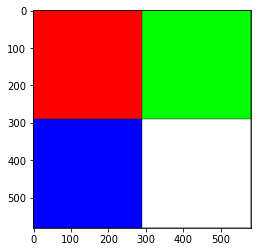

In [6]:
# Load the image
squares = cv2.imread('../Images/squares.png')

# Convert from BGR to RGB
rgb_squares = cv2.cvtColor(squares, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(rgb_squares)

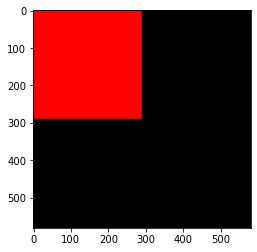

In [7]:
# Define the color code /!\ BGR format
black = np.array([0, 0, 0])
blue = np.array([255, 0, 0])
green = np.array([0, 255, 0])
red = np.array([0, 0, 255])
white = np.array([255, 255, 255])

# Threshold the image to get only red color
mask = cv2.inRange(squares, black, red)

# Apply a `and` mask to keep only red pixels
res = cv2.bitwise_and(squares, squares, mask=mask)

# Display the result
rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

#### Step 6: detection of an object in a video
Now that we have a tool to segment pixels of a given color, we can apply the same method to track the yellow book in the video.

In [ ]:
# Read the video
vid = cv2.VideoCapture('book.mov')

# Frames per second of your webcam
FPS = vid.get(cv2.CAP_PROP_FPS)

# Size of your frames
frame_w = int(vid.get(3))
frame_h = int(vid.get(4))

# Create the object to save the processed video
rec = cv2.VideoWriter('segmented_book.mov', cv2.VideoWriter_fourcc('m', 'p', '4', 'v'), FPS, (frame_w, frame_h))

# While the video lasts
while(vid.isOpened()):

    # Get the frame
    ret, frame = vid.read()
    
    # If no more frames, break
    if ret == False:
        break

    # Define the color to track the yellow book 
    lower_yellow = np.array([0,80,80])
    upper_yellow = np.array([50,255,255])
    
    # Threshold the image to get only the yellow book
    mask = cv2.inRange(frame, lower_yellow, upper_yellow)
    
    # Apply a `and` mask to keep only the yellow book
    res = cv2.bitwise_and(frame, frame, mask=mask)

    # Write the result
    rec.write(res)

vid.release()
rec.release()